***
# Project 1 - Phenotypic Prediction from Transcriptomic Features
***

### Team Members : 
- Jay Bhatt [111491357]
- Faizaan Charania [111463646]
- Jay Toraskar [111406252]

***

## Imports

In [1]:
import pandas as pd
import numpy as np
import pickle as pkl
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import utilities
import os
import gc

## Data Extraction

 Extracted the TPM value for each Accession folder and stored in the 'tpm_train.pkl' file.

In [2]:
with open("tpm_train.pkl", 'rb') as input_file:
    data = pkl.load(input_file)
    

In [3]:
data = pd.DataFrame(data)    
data.set_index(0, inplace=True)
label = data[199325]

data.columns = [str(i) for i in data.columns]

In [4]:
X = data.drop(['199325'], axis=1)
y = label

In [6]:
X = X.astype(np.float32)

In [7]:
y.value_counts(dropna=False)

FIN    77
GBR    77
CEU    72
TSI    72
YRI    71
Name: 199325, dtype: int64

In [9]:
X.head()

1    2        3    4    5    6    7    8         9   10  \
0                                                                           
ERR188408  0.234074  0.0  3.67617  0.0  0.0  0.0  0.0  0.0  0.424268  0.0   
ERR188348  0.000000  0.0  1.98881  0.0  0.0  0.0  0.0  0.0  0.137385  0.0   
ERR188021  0.221792  0.0  5.42060  0.0  0.0  0.0  0.0  0.0  1.080040  0.0   
ERR188289  0.000000  0.0  8.29350  0.0  0.0  0.0  0.0  0.0  0.404072  0.0   
ERR188262  0.016667  0.0  2.00487  0.0  0.0  0.0  0.0  0.0  0.680980  0.0   

              ...             199315     199316     199317      199318  \
0             ...                                                        
ERR188408     ...        8344.730469  47.279900  67.131699  309.765015   
ERR188348     ...        7749.709961  18.325001  33.006401   23.371000   
ERR188021     ...        8584.839844  35.289902  36.760399   92.426003   
ERR188289     ...        7107.479980  27.253099  62.682098   87.815498   
ERR188262     ...       10734.000000  28.609100  79.920303  103.341003   

                199319       199320      199321       199322      199323  \
0                                                                          
ERR188408  3487.449951  8528.700195  205.423004  5413.819824  423.902008   
ERR188348  2073.770020  5866.830078  148.636002  4562.600098  360.488007   
ERR188021  3532.689941  5837.020020  299.964996  3237.989990   85.903198   
ERR188289  2366.439941  6055.959961  121.125000  2903.419922  459.035004   
ERR188262  3527.360107  6186.930176   74.823898  5829.339844  119.750000   

                199324  
0                       
ERR188408  3361.919922  
ERR188348  1861.000000  
ERR188021  2026.969971  
ERR188289  1813.839966  
ERR188262  2343.639893  

[5 rows x 199324 columns]

In [11]:
y.head()

0
ERR188408    TSI
ERR188348    CEU
ERR188021    TSI
ERR188289    GBR
ERR188262    CEU
Name: 199325, dtype: object

***
## Trying ExtraTreesClassifier on TPM for finding Feature importance

In [14]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250, n_jobs=-1, bootstrap=True, oob_score=True, verbose=1,
                              random_state=0)

# using out-of-bag samples for testing generalization accuracy

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1])[:15]:
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.9s finished


Feature ranking:
1. feature 187376 (0.001256)
2. feature 72791 (0.001139)
3. feature 198083 (0.000992)
4. feature 30344 (0.000885)
5. feature 75048 (0.000849)
6. feature 167874 (0.000842)
7. feature 37265 (0.000841)
8. feature 39498 (0.000833)
9. feature 195455 (0.000751)
10. feature 52510 (0.000726)
11. feature 58880 (0.000724)
12. feature 189609 (0.000691)
13. feature 83017 (0.000683)
14. feature 124054 (0.000681)
15. feature 189296 (0.000678)


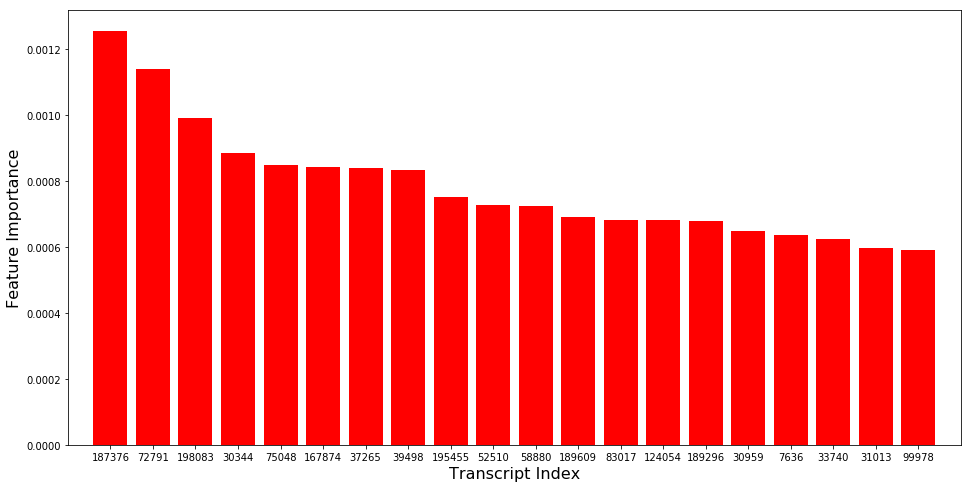

In [26]:
# Plot the feature importances of the forest
count = 20
plt.figure(figsize=(16, 8))
# plt.bar(range(X_train.shape[1]), importances[indices],
#        color="r", yerr=std[indices], align="center")
plt.bar(range(count), importances[indices[:count]],
       color="r", align="center")

# plt.xticks(range(X_train.shape[1]), indices)
plt.xticks(range(count), indices[:count])
plt.xlim([-1, count])
plt.xlabel("Transcript Index", fontsize=16)
plt.ylabel("Feature Importance", fontsize=16)
# plt.xlim([-1, X_train.shape[1]])
plt.show()

### Dumping the variables to pickle
To save processing time for future runs

In [28]:
if not os.path.exists("indices.pkl"):
    with open("indices.pkl", 'wb') as out:
        pkl.dump(indices, out)

In [29]:
if not os.path.exists("X.pkl"):
    with open("X.pkl", 'wb') as out:
        pkl.dump(X, out)

In [30]:
if not os.path.exists("y.pkl"):
    with open("y.pkl", 'wb') as out:
        pkl.dump(y, out)

In [31]:
X = X.iloc[:, indices[:10000]]

In [32]:
if not os.path.exists("X_train_reduced.pkl"):
    with open("X_train_reduced.pkl", 'wb') as out:
        pkl.dump(X, out)

***
## Implementing PCA on the selected important features

In [34]:
pca = PCA(n_components=512)
X_new = pca.fit_transform(X)

In [35]:
X_new.shape

(369, 369)

Interesting observation, after trying PCA we get a worse answer. This is because the fact that we have very less data to train on.<br>
***

## Cross Validation on RandomForestClassifier
<br>
<b>Parameters for the Forest :</b>
- Number of trees = 200
- Max depth of a tree - 60

<b>Parameters Cross validation :</b>
- number of folds = 5

In [36]:
clf = RandomForestClassifier(n_estimators=200, max_depth=60, random_state=0, n_jobs=-1)
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')

print scores.mean(), scores.std()

0.868920035589 0.0386386570638


## MLPClassifier

In [37]:
with open("indices.pkl", 'rb') as in_file:
    indices = pkl.load(in_file)

In [39]:
with open("X_train_reduced.pkl", 'rb') as in_file:
    X = pkl.load(in_file)

In [40]:
with open("y.pkl", 'rb') as in_file:
    y = pkl.load(in_file)

In [42]:
X.shape

(369, 10000)

In [46]:
## Performing 5 fold cross validation on MLP Classifier
kf = KFold(n_splits=5)
kf.get_n_splits(X)

print(kf)  

scaler = StandardScaler()

scores = []
count =1
for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train = scaler.fit_transform(X_train)

    clf = MLPClassifier(hidden_layer_sizes=(256, 128), activation='logistic', #solver='lbfgs', #learning_rate='adaptive',
                    verbose=False, tol=1e-5 ,max_iter=500, learning_rate_init=0.005
#                     warm_start = True
                   )
    
    clf.fit(X_train, y_train)
    
    X_test = scaler.transform(X_test)
    y_pred = clf.predict(X_test)
    
    scores.append(f1_score(y_test, y_pred, average='macro'))
    print count,") f1_score : ", scores[-1]
    count+=1
    
    

KFold(n_splits=5, random_state=None, shuffle=False)
1 ) f1_score :  0.933732501733
2 ) f1_score :  0.876975733497
3 ) f1_score :  0.889085515893
4 ) f1_score :  0.941615878278
5 ) f1_score :  0.911


In [47]:
print "The average f-1 score is ",sum(scores)/len(scores)

The average f-1 score is  0.91048192588


***
## Future Use

Using information from equivalence classes

In [ ]:
folder_names = get_folder_names("./train/")

# master_set = set()
all_eq_c = {}
for f in folder_names:
    with open("./train/" + f +"/bias/aux_info/eq_classes.txt") as eq_file:
        eq_c = eq_file.read()
    eq_c = eq_c.split("\n")
    eq_c = eq_c[199326:]
    cur_eq_c = {}
    
    for e in eq_c:
        e = e.split('\t')
        cur_eq_c[''.join(e[:-1])] = e[-1]
#         master_set.add(''.join(e[:-1]))
    
    
    all_eq_c[f] = cur_eq_c
    


In [ ]:
pkl.dump(master_set,open('master_set.pkl','wb'))

In [ ]:
with open('./master_set.pkl', 'rb') as f:
    master_set = pkl.load(f)

In [ ]:
for k in all_eq_c.keys():
    with open('./eq_classes/'+k+'.pkl', 'wb') as out_file:
        pkl.dump(all_eq_c[k], out_file)

In [ ]:
train = pd.DataFrame(np.zeros((len(folder_names),len(master_set)-1)),columns=list(master_set)[1:])

In [ ]:
del master_set
gc.collect()

In [ ]:
f = pd.Series(list(master_set))